In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn import metrics

from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense 
from keras.layers import Dropout
 
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/My Drive/AAPLmain.csv')
df.head()

Mounted at /content/drive


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [7]:
df.shape

(10664, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,1.066400e+04
mean,17.214226,17.411780,17.021893,17.224528,16.533494,3.261870e+08
std,36.387008,36.832052,35.965057,36.417573,36.066055,3.374503e+08
min,0.049665,0.049665,0.049107,0.049107,0.038154,0.000000e+00
25%,0.287946,0.296875,0.282366,0.289063,0.238623,1.201032e+08
50%,0.491071,0.498884,0.483962,0.491071,0.407027,2.135056e+08
75%,16.693303,16.851606,16.577144,16.695893,14.498148,4.058439e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10664 entries, 0 to 10663
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10664 non-null  object 
 1   Open       10664 non-null  float64
 2   High       10664 non-null  float64
 3   Low        10664 non-null  float64
 4   Close      10664 non-null  float64
 5   Adj Close  10664 non-null  float64
 6   Volume     10664 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 583.3+ KB


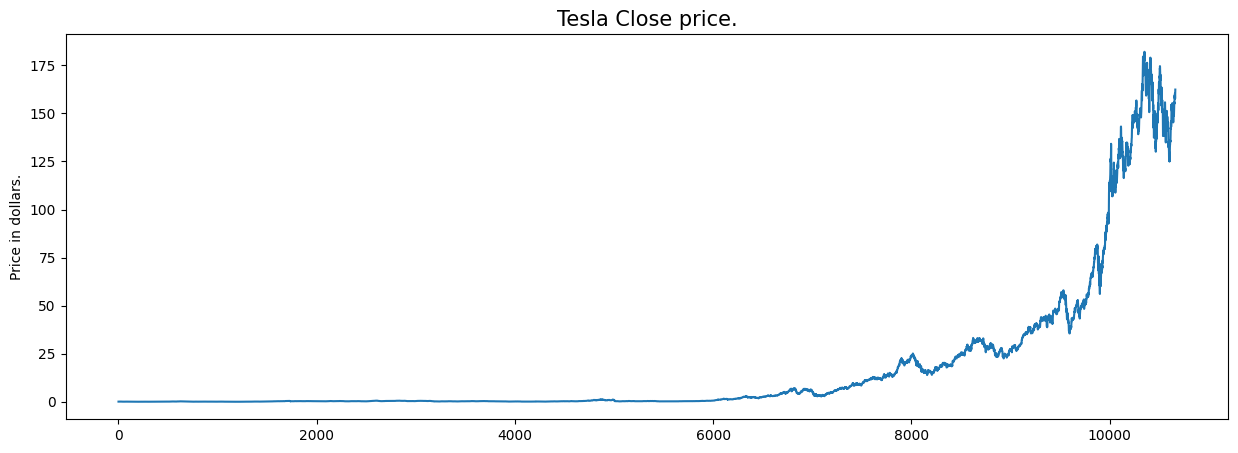

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [12]:
df[df['Close'] == df['Adj Close']].shape

(34, 7)

In [13]:
df = df.drop(['Adj Close'], axis=1)

In [14]:
'''checking for null values'''
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

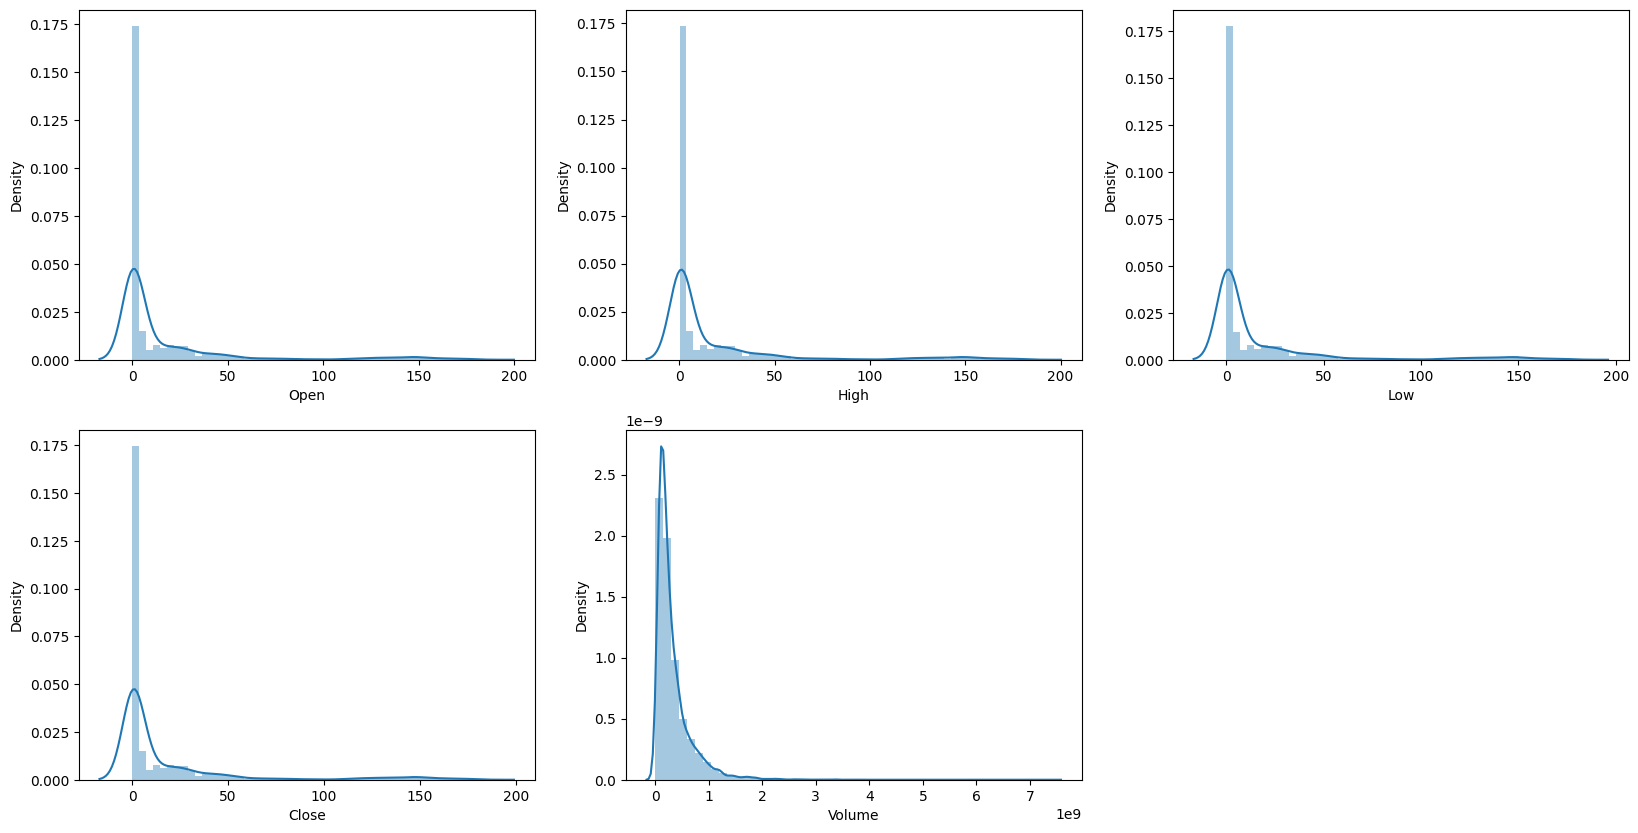

In [15]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

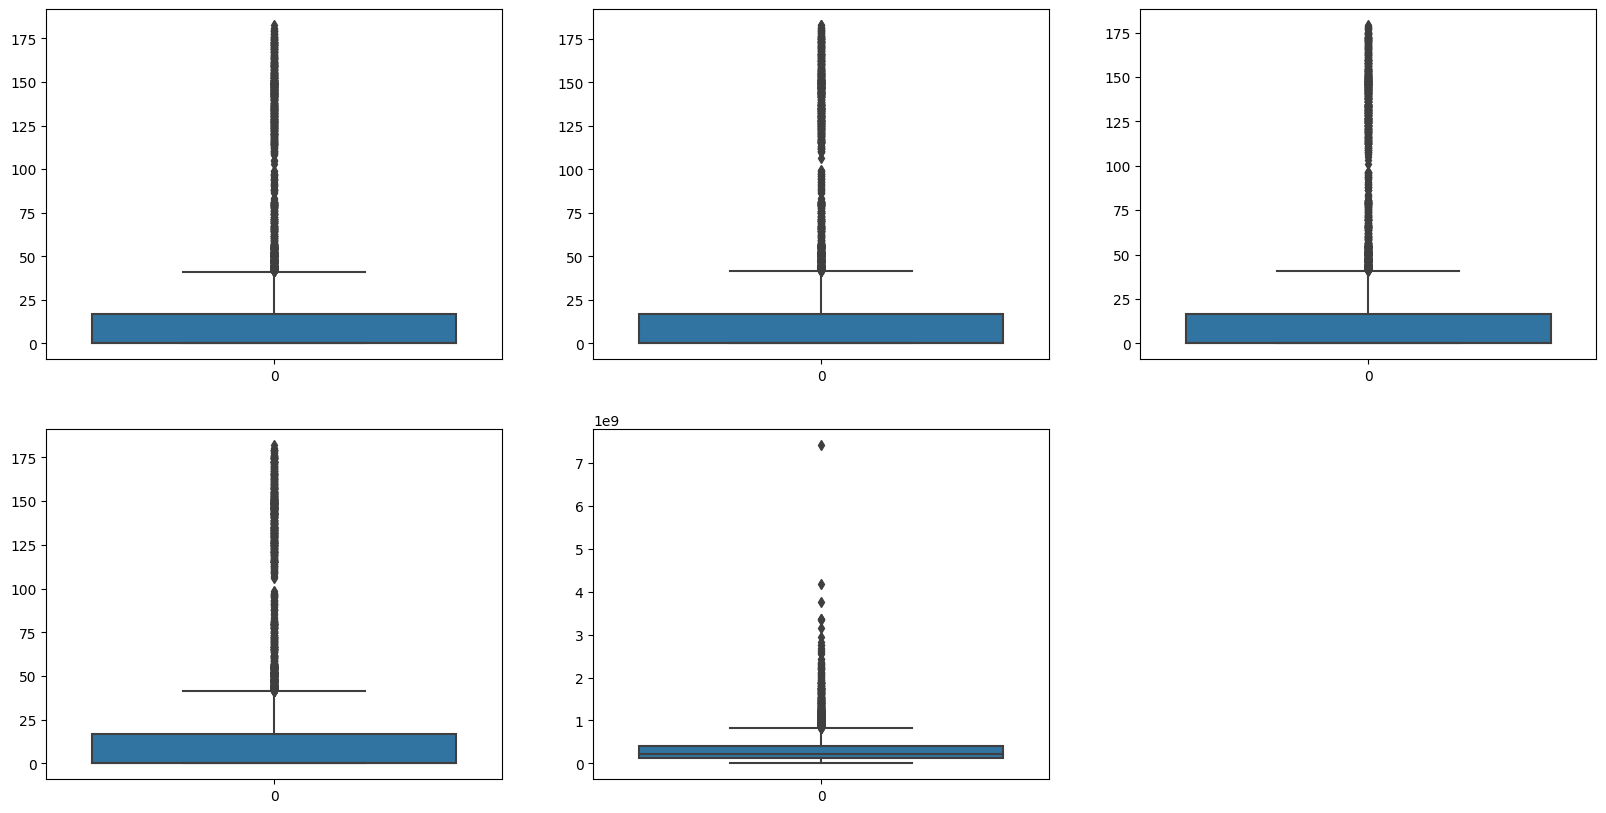

In [16]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [17]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,12,12,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,15,12,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,16,12,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,17,12,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,18,12,1980


In [18]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,12,12,1980,1
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,15,12,1980,1
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,16,12,1980,1
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,17,12,1980,1
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,18,12,1980,1


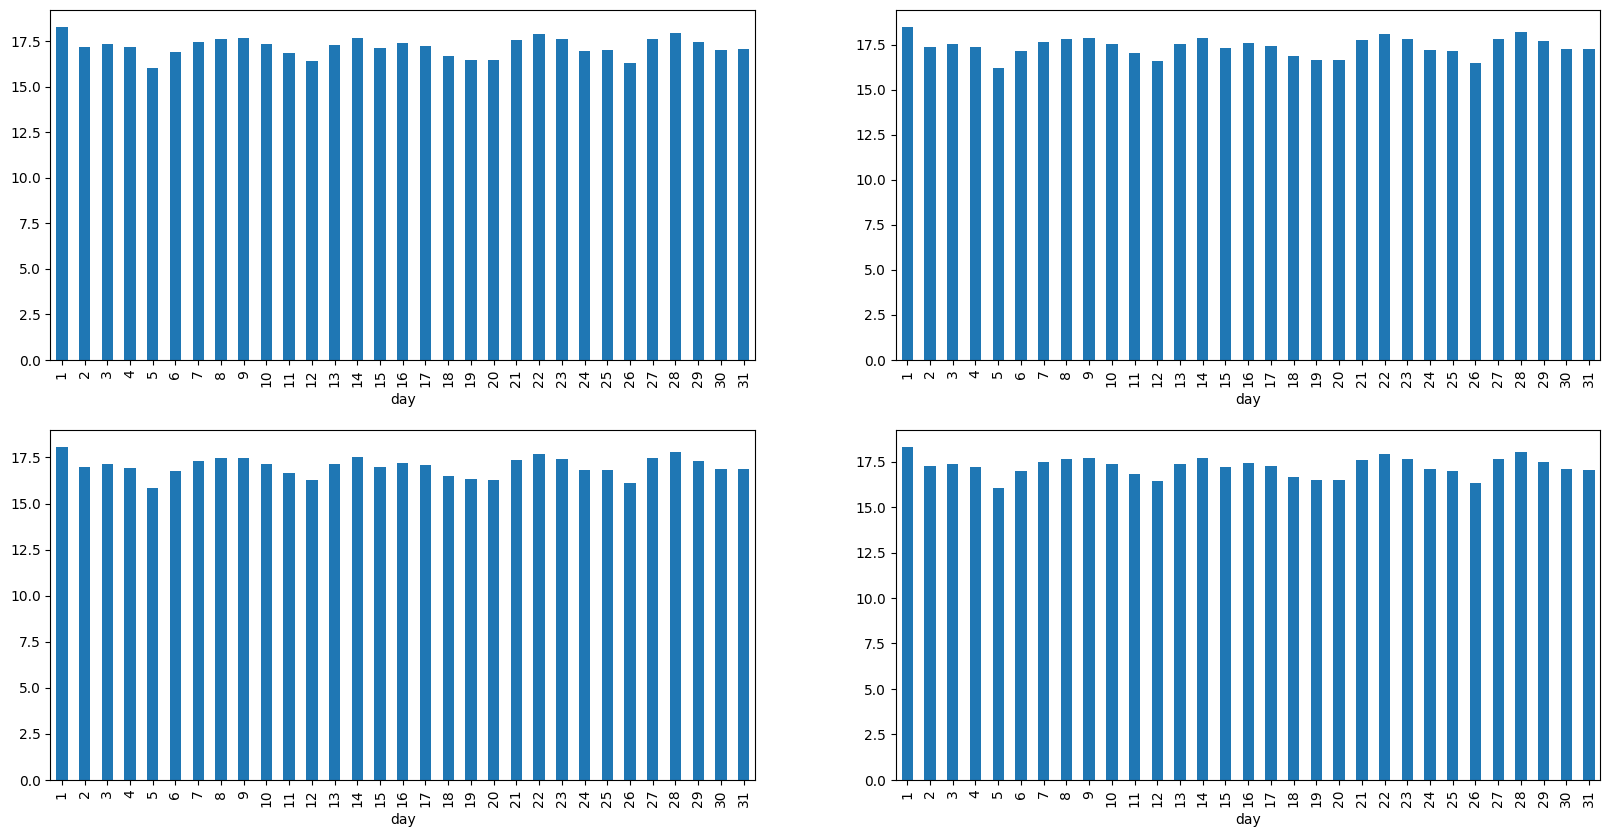

In [19]:
data_grouped = df.groupby('day').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [20]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

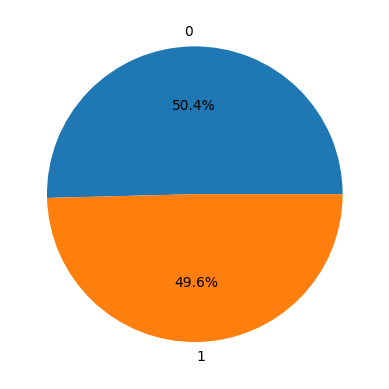

In [21]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

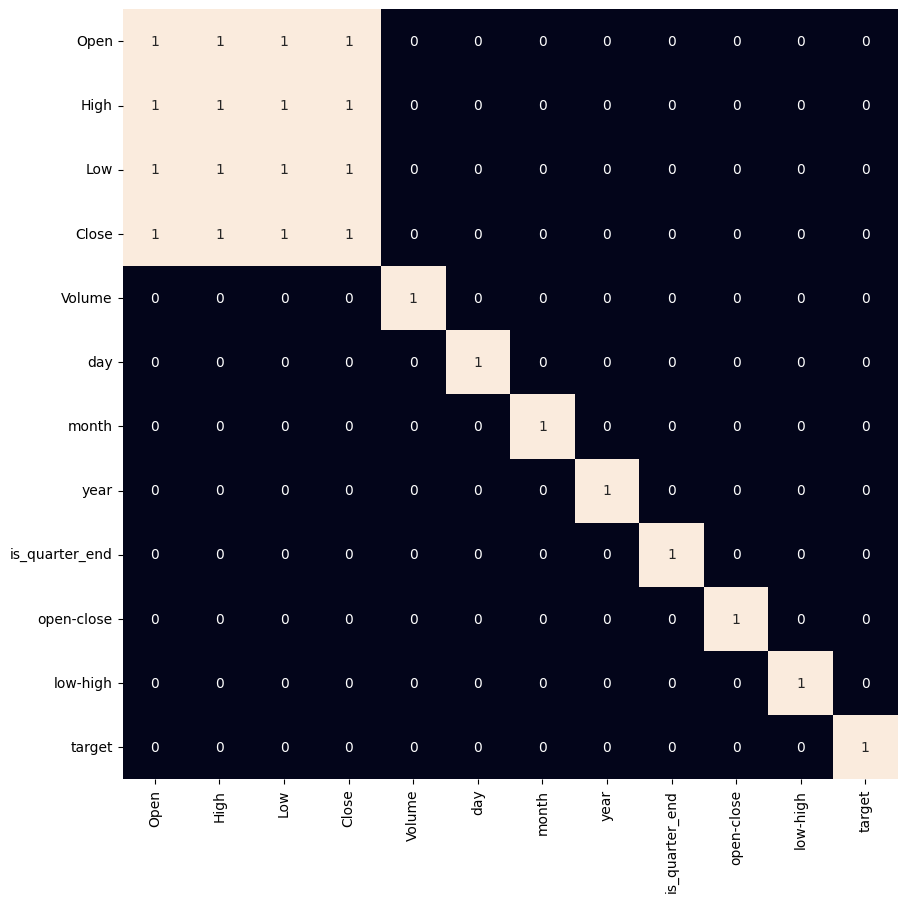

In [22]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [23]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(9597, 3) (1067, 3)


In [24]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5269174389766803
Validation Accuracy :  0.5309185412646317

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5174615996250385
Validation Accuracy :  0.5082983533587819

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura

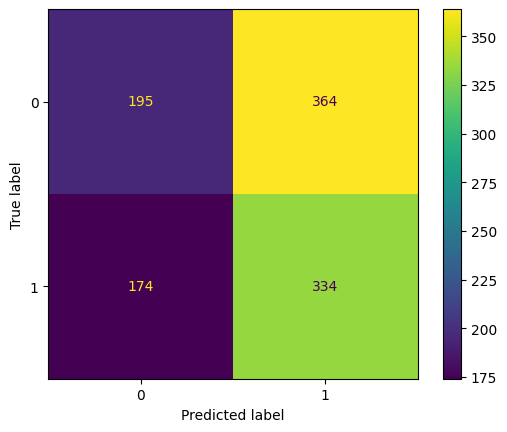

In [25]:
metrics.ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

In [26]:
dataset_train = pd.read_csv('drive/My Drive/AAPLmain.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [27]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print (training_set.shape)

[[1.28348000e-01]
 [1.22210000e-01]
 [1.13281000e-01]
 ...
 [1.57970001e+02]
 [1.59369995e+02]
 [1.61529999e+02]]
(10664, 1)


In [28]:
scaler = MinMaxScaler (feature_range = (0,1)) 
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [8.64936148e-01],
       [8.72603973e-01],
       [8.84434403e-01]])

In [29]:
X_train = []
y_train = []
for i in range(60,10664):
    X_train.append(scaled_training_set[i-60:i, 0]) 
    y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [30]:
print( X_train.shape)
print( y_train.shape)

(10604, 60)
(10604,)


In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(10604, 60, 1)

In [32]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout (0.2))
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.2))
regressor.add(LSTM(units = 50))
regressor.add (Dropout (0.2))
regressor.add(Dense (units=1))

In [33]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
332/332 [==============================] - 39s 97ms/step - loss: 0.0016
Epoch 2/100
332/332 [==============================] - 33s 100ms/step - loss: 9.3655e-04
Epoch 3/100
332/332 [==============================] - 33s 99ms/step - loss: 7.0339e-04
Epoch 4/100
332/332 [==============================] - 33s 101ms/step - loss: 7.4586e-04
Epoch 5/100
332/332 [==============================] - 33s 99ms/step - loss: 5.4808e-04
Epoch 6/100
332/332 [==============================] - 34s 103ms/step - loss: 5.1180e-04
Epoch 7/100
332/332 [==============================] - 36s 107ms/step - loss: 5.8654e-04
Epoch 8/100
332/332 [==============================] - 33s 99ms/step - loss: 5.5345e-04
Epoch 9/100
332/332 [==============================] - 34s 103ms/step - loss: 5.5403e-04
Epoch 10/100
332/332 [==============================] - 33s 100ms/step - loss: 5.0412e-04
Epoch 11/100
332/332 [==============================] - 34s 103ms/step - loss: 4.6300e-04
Epoch 12/100
332/332 [=====

In [34]:
dataset_test = pd.read_csv("drive/My Drive/TSLA2023-Jan-March.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [35]:
dataset_total = pd.concat((dataset_train [ 'Open'], dataset_test['Open']), axis = 0) 
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs.shape

X_test = []
for i in range(60,120):
    X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1] , 1))

In [36]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


2/2 [==============================] - 1s 28ms/step


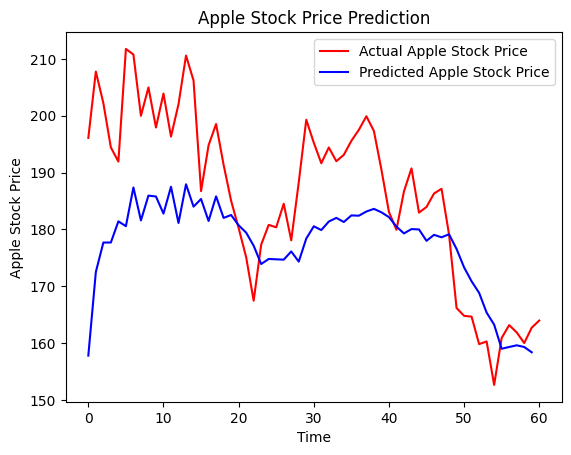

In [37]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Apple Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()